<a href="https://colab.research.google.com/github/sourabh9854/MACHINE-LEARNING/blob/main/AIGENERATEDORNOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [3]:
df = tf.keras.preprocessing.image_dataset_from_directory(r"/content/drive/MyDrive/train/ralandfake",
                                                        shuffle=True ,
                                                        image_size = (256,256),
                                                        batch_size = 32)

Found 5014 files belonging to 2 classes.


In [4]:
classes =df.class_names
classes

['AI', 'real']

In [5]:
for image_batch,label_batch in df.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1]


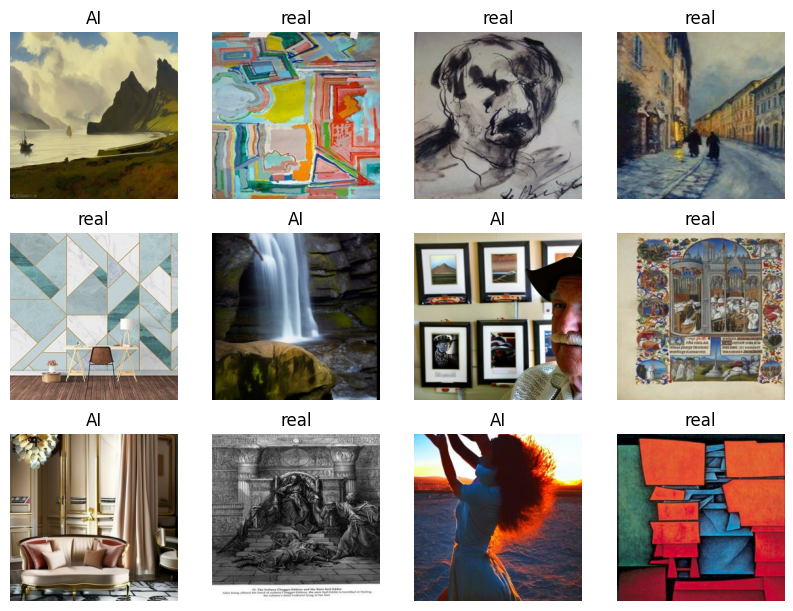

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in df.take(1):
    for i in range(12):
     ax = plt.subplot(4,4,i+1)
     plt.title(classes[label_batch[i]])
     plt.imshow(image_batch[i].numpy().astype('uint8'))
     plt.axis('off')


In [7]:
train_size = 0.8
len(df)*train_size

125.60000000000001

In [8]:
train_ds = df.take(54)
len(train_ds)

54

In [9]:
test_ds = df.skip(54)
len(test_ds)

103

In [10]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [11]:
test_ds = test_ds.skip(6)
len(test_ds)

97

In [12]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50


In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256,256),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [15]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [16]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 31s 376ms/step - loss: 0.7172 - accuracy: 0.5347 - val_loss: 0.6904 - val_accuracy: 0.5833
Epoch 2/50
54/54 [==============================] - 15s 283ms/step - loss: 0.6529 - accuracy: 0.6152 - val_loss: 0.5357 - val_accuracy: 0.7240
Epoch 3/50
54/54 [==============================] - 15s 273ms/step - loss: 0.5865 - accuracy: 0.6840 - val_loss: 0.4825 - val_accuracy: 0.7552
Epoch 4/50
54/54 [==============================] - 15s 280ms/step - loss: 0.5586 - accuracy: 0.7020 - val_loss: 0.4932 - val_accuracy: 0.7760
Epoch 5/50
54/54 [==============================] - 16s 287ms/step - loss: 0.5560 - accuracy: 0.7112 - val_loss: 0.4621 - val_accuracy: 0.7969
Epoch 6/50
54/54 [==============================] - 15s 272ms/step - loss: 0.5511 - accuracy: 0.7106 - val_loss: 0.4641 - val_accuracy: 0.7917
Epoch 7/50
54/54 [==============================] - 16s 287ms/step - loss: 0.5519 - accuracy: 0.7286 - val_loss: 0.4611 - val_accuracy: 0.7917

first image to predict
actual label: AI
1/1 [==============================] - 0s 158ms/step
predicted label: AI


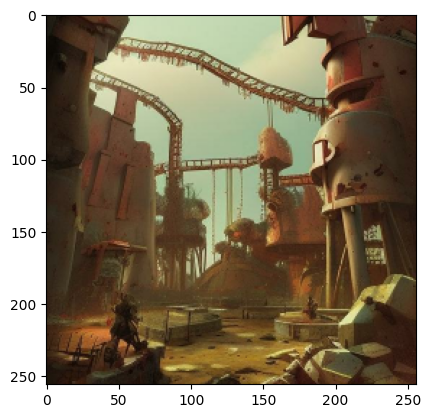

In [21]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classes[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",classes[np.argmax(batch_prediction[0])])
